타이타닉

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# EDA
- target 피쳐 확인/분리
- info(), shape, head() - dataframe 타입별(수치형/object)


In [3]:
df = pd.read_csv("data/train.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.groupby(['Sex','Survived'])['Survived'].count().to_frame()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

## target feature 선정     :    Survived
 - Target 피쳐 선정
 - 1   Survived     891 non-null    int64

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
X = df.drop('Survived', axis=1) # survived 열을 뺀 나머지 모든 data
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
y = df['Survived'] # 오직 Survived 결과 컬럼
y.head

<bound method NDFrame.head of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

# 결측치 확인
- 삭제
- 대체값
- 예측

## 삭제처리

### Embarked

In [13]:
#  11  Embarked     889 non-null    object  --> 생존과 무관해 보임

#Embarked  : 경유지   C , Q , S

pd.crosstab(X["Embarked"], y).T

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [14]:
pd.crosstab([X["Embarked"], X["Pclass"]], y).T

Embarked   C         Q          S         
Pclass     1  2   3  1  2   3   1   2    3
Survived                                  
0         26  8  41  1  1  45  53  88  286
1         59  9  25  1  2  27  74  76   67

### PassengerId

In [15]:
print(X.shape)
print(X.info())

(891, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None


In [16]:
#삭제피쳐 : 일련번호

X.drop(["PassengerId"], axis=1, inplace=True)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


## 대체값 처리
- 머신러닝에서 Object 는 알아 볼 수 없는 데이터 형.

 -   Object 처리
 - 3   Name         891 non-null    object --> Sex 로 성별 구분 가능
 - 4   Sex          891 non-null    object --> lambda 식을 활용하여 male =1, female=0
 - 8   Ticket       891 non-null    object --> 의미있는 데이터로 보기 어렵다고 판단
 - 10  Cabin        204 non-null    object --> 687의 결측 --> 버리자 / 너무 많은 결측치
 - 11  Embarked     889 non-null    object -->


### Sex (object ->0 |1 ) 변경

In [18]:
#object 형인 성별을 0/1로 변경 
X['Sex'] = X['Sex'].apply(lambda x: 0 if x=='female' else 1)
print(df['Sex'].head)
print(X['Sex'].head)

<bound method NDFrame.head of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>
<bound method NDFrame.head of 0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64>


### 결측치Cabin

In [19]:
nnl = X[X['Cabin'].isnull() == False].copy() # Cabin 중 null이 아닌 data
nnl #204개 data


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
871,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.5542,D35,S
872,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5.0000,B51 B53 B55,S
879,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,C
887,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S


In [20]:
nnl.isnull().sum() 
# cabin 에서 null이 아닌것들만 뽑은 nnl 에서는 cabin에 null값이 없는 것을 확인 할 수 있음.

Pclass       0
Name         0
Sex          0
Age         19
SibSp        0
Parch        0
Ticket       0
Fare         0
Cabin        0
Embarked     2
dtype: int64

In [21]:
print(nnl["Cabin"]) # null을 제외한 Cabin의 데이터

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object


In [22]:
# null값을 제외한 Cabin 의 값
nnl['Cabin']

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [23]:
nnl["Cabin"].isnull().sum() # nnl에는 더이상 null 값이 없는 것을 확인

0

- 삭제 할 feature :  중복된 특징, (고유한) 일련번호(passengerId)-살았니죽었니에 전혀 영향을 주지 않음
- 병합 할 feature : 가족수(SibSp , Parch) : 중복되었기 때문.

In [24]:
X.isnull().sum() 
## dd (Cabin) 컬럼에 있는 null의 갯수 --> null : 687개 --> 너무 많은 결측치가 있으므로 버림


Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [25]:
#Cabin 컬럼의 값 중 null 이 아닌 값들의 객실번호 맨 앞글자 알파벳 추출하기

X['Cabin2'] = nnl['Cabin'].str[0:1] # str[0]  / X는 컬럼 10개이고, 복사본인 dd 는  11개의 컬럼이되면 괜찮아?
print(X['Cabin2'])

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin2, Length: 891, dtype: object


 crosstab
 :   범주형 변수로 되어있는 요인(factors) 별로 교차분석(cross tabulations) 해서, 행, 열 요인 기준 별로 빈도를 세어 도수분포표(frequency table), 교차표(contingency table) 를 만들어줌
- factor : survived 0/1
 

In [27]:
pd.crosstab(X["Cabin2"], y).T
# y = Survived

Cabin2,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0,8,12,24,8,8,5,2,1
1,7,35,35,25,24,8,2,0


In [28]:
pd.crosstab(X["Cabin2"], X['Pclass']).T


Cabin2,A,B,C,D,E,F,G,T
Pclass,,,,,,,,
1,15,47,59,29,25,0,0,1
2,0,0,0,4,4,8,0,0
3,0,0,0,0,3,5,4,0


In [29]:
pd.crosstab(X["Pclass"], y).T


Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [30]:
pd.crosstab([X["Pclass"], X['Sex']], y).T

Pclass     1       2       3     
Sex        0   1   0   1   0    1
Survived                         
0          3  77   6  91  72  300
1         91  45  70  17  72   47

### 결측처리 Age

In [20]:
X['Age'].isnull().sum() # Age 컬럼에 결측치 : 117건

177

In [21]:
cp = X[X['Age'].isnull()==True].copy()
cp

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin2
5,6,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,NaN
17,18,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S,NaN
19,20,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C,NaN
26,27,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C,NaN
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,3,"Razi, Mr. Raihed",1,NaN,0,0,2629,7.2292,NaN,C,NaN
863,864,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN
868,869,3,"van Melkebeke, Mr. Philemon",1,NaN,0,0,345777,9.5000,NaN,S,NaN
878,879,3,"Laleff, Mr. Kristo",1,NaN,0,0,349217,7.8958,NaN,S,NaN


In [22]:
cp['Age2'] = cp['Age'].fillna(30)
cp[['Age','Age2']]
# cp['Age2'] = cp['Age'].fillna().mean
# print(cp[['Age','Age2']])

,Age,Age2
5,NaN,30.0
17,NaN,30.0
19,NaN,30.0
26,NaN,30.0
28,NaN,30.0
...,...,...
859,NaN,30.0
863,NaN,30.0
868,NaN,30.0
878,NaN,30.0


In [23]:
## 나이 예측을 위한 이름 호칭 추출  / Sibsp , Parch --> 연관지어 나이 추측하기
# 호칭만 뽑아낸 Name2를 이용하여 Age null 값 채우기
X['Name2']= X['Name'].str.extract("([A-Za-z]+)\.")
# Name2 --> Mr, Miss 등 호칭으로 나이를 예측해보자.
X[['Name','Name2','Age']]

,Name,Name2,Age
0,"Braund, Mr. Owen Harris",Mr,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,38.0
2,"Heikkinen, Miss. Laina",Miss,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,35.0
4,"Allen, Mr. William Henry",Mr,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",Rev,27.0
887,"Graham, Miss. Margaret Edith",Miss,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,NaN
889,"Behr, Mr. Karl Howell",Mr,26.0


In [24]:
dict = X.groupby(by=['Name2'])[['Name2','Age']].mean().astype(np.int32)
dict

,Age
Name2,
Capt,70
Col,58
Countess,33
Don,40
Dr,42
Jonkheer,38
Lady,48
Major,48
Master,4


In [25]:
dict = dict = X.groupby(by=['Name2'])[['Name2','Age']].mean().astype(np.int32).to_dict()
print(dict['Age'])

{'Capt': 70, 'Col': 58, 'Countess': 33, 'Don': 40, 'Dr': 42, 'Jonkheer': 38, 'Lady': 48, 'Major': 48, 'Master': 4, 'Miss': 21, 'Mlle': 24, 'Mme': 24, 'Mr': 32, 'Mrs': 35, 'Ms': 28, 'Rev': 43, 'Sir': 49}


In [26]:
fill_mean_func = lambda gname: gname.fillna(dict['Age'][gname.name])  #암기!!
X = X.groupby('Name2').apply(fill_mean_func)
print (X[['Name2','Name','Age']].head(10))


    Name2                                               Name   Age
0      Mr                            Braund, Mr. Owen Harris  22.0
1     Mrs  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2    Miss                             Heikkinen, Miss. Laina  26.0
3     Mrs       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4      Mr                           Allen, Mr. William Henry  35.0
5      Mr                                   Moran, Mr. James  32.0
6      Mr                            McCarthy, Mr. Timothy J  54.0
7  Master                     Palsson, Master. Gosta Leonard   2.0
8     Mrs  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  27.0
9     Mrs                Nasser, Mrs. Nicholas (Adele Achem)  14.0


In [27]:
X['Age'].mean() # 평균 29.6세 --> 30세 

29.654511784511783

In [28]:
#나이 구간화
# X["Age"] = X['Age'].fillna(30) 
# fillna 자체가 null인 애를 채워라! --> 결측값들을  임의로 30세라고 채워놓음.

In [29]:
# 10대부터 80대로 나눔
X["Age_cate"] = X["Age"].apply(lambda x: int(x//10)*10)
print(X[["Age_cate",'Age']])

     Age_cate   Age
0          20  22.0
1          30  38.0
2          20  26.0
3          30  35.0
4          30  35.0
..        ...   ...
886        20  27.0
887        10  19.0
888        20  21.0
889        20  26.0
890        30  32.0

[891 rows x 2 columns]


### 병합처리 SibSp+Parch 

In [35]:
#병합힐 feature
#  6   SibSp        891 non-null    int64
#  7   Parch        891 non-null    int64

X["SP"] = X["SibSp"] + X["Parch"]
X[["SP", "SibSp", "Parch"]] # SP 로 합쳐졌으므로 SibSp,Parch 는 삭제 대상! 


,SP,SibSp,Parch
0,1,1,0
1,1,1,0
2,0,0,0
3,1,1,0
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,0
888,3,1,2
889,0,0,0


In [36]:
# Survived 에 관련있을 것 같은 컬럼만 남기기

replace_col = ['SibSp','Parch','Name','Name2','Age'] #SP =sibsp+Parch/ Age_cate = Name,Name2,Age
del_col = ["Ticket","Fare","Cabin","Cabin2","Embarked"] # survived  에 관련 없는 컬럼 삭제하기
            #Fare, embarked 는 남길 사람은 남기기 
replace_col = replace_col + del_col
replace_col

['SibSp',
 'Parch',
 'Name',
 'Name2',
 'Age',
 'Ticket',
 'Fare',
 'Cabin',
 'Cabin2',
 'Embarked']

In [37]:
X.drop(replace_col, axis=1, inplace=True)
X.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age_cate  891 non-null    int64
 3   SP        891 non-null    int64
dtypes: int64(4)
memory usage: 28.0 KB


--> heatmap
- data, *,
- vmin=None, vmax=None, cmap=None, center=None, robust=False,
- annot=None, fmt=".2g"

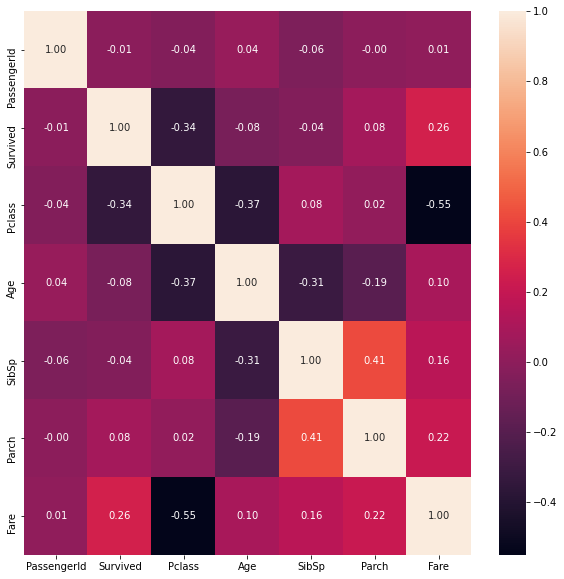

In [38]:
# df.corr()  :  상관분석

plt.figure(figsize=(10,10)) # 상관분석은 object 알아서 빼냄. int, folat형만 가지고 상관분석을 진행함.
sns.heatmap(data=df.corr(), annot=True, fmt=".2f") # y에 중대한영향을 미치는건지 보고싶어서 y 가들어간 df를 함.
plt.show()

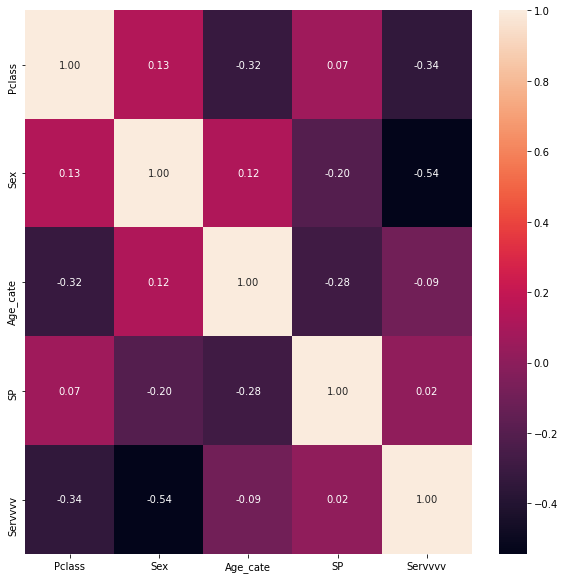

In [39]:
#heatmap
# data, *,
#     vmin=None, vmax=None, cmap=None, center=None, robust=False,
#     annot=None, fmt=".2g"

# df.corr() # 상관분석
# plt.figure(figsize=(10,10)) # 상관분석은 object 알아서 빼냄. int, folat형만 가지고 상관분석을 진행함.
# sns.heatmap(data=df.corr(), annot=True, fmt=".2g") # y에 중대한영향을 미치는건지 보고싶어서 y 가들어간 df를 함.
# plt.show()

heat_df = X.copy()
heat_df['Servvvv'] = y
plt.figure(figsize=(10,10))
sns.heatmap(data=heat_df.corr(), annot=True, fmt=".2f") #cmap=Blue
plt.show()


- 상관분석을 통해 다중공선을 제거 용도로도 사용 할 수 있음.
- 상관관계가 너무 높으면 두 피쳐 사이에 다중공선이 있다.
- 타겟에 주요한 영향을 미치는 feature를 선정

# Feature 전처리 

## 원 핫 코딩
- Object 를 수치형으로 변환 필수! 수치형만 적용가능!
- 머신러닝에서는 수치가 크면 좋은줄 앎
- 희소행렬 : 0이 많은 데이터  01001110
#print(X.info()) --> 'Age_cate'
- 원핫 인코딩 --> get dummy 를 이용함.  pd.get_dummies(df)
- pd.get_dummies(df) : null처리 알아서 다 0으로 채우고 인코딩해줌. (귀찮으면 맡기고... 아니면 알아서 null처리하고 인코딩...)
- 머신러닝에서 사용되는 보편적인 데이터 변형 방법
- 숫자로 변환할때 각 분류를 편향되지 않게 컴퓨터에게 학습
- 이 값은 이산적이므로 연속형 변수로 다루면 안된다.

In [64]:
#OneHotEncoder().fit(xx)  --> 예시
print(X["Age_cate"].head())

0    20
1    30
2    20
3    30
4    30
Name: Age_cate, dtype: int64



- data,
- prefix = None,  --> 컬럼명...
- prefix_sep = "_",
- dummy_na = False,
- columns = None,
- sparse = False,
- drop_first = False,
- dtype = None,

In [65]:
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age_cate  891 non-null    int64
 3   SP        891 non-null    int64
dtypes: int64(4)
memory usage: 28.0 KB
None


In [66]:
X_encoding = pd.get_dummies(data=X, columns=["Age_cate"], prefix = "OH_Age_cate")  #, drop_first = True
print(X_encoding.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Pclass          891 non-null    int64
 1   Sex             891 non-null    int64
 2   SP              891 non-null    int64
 3   OH_Age_cate_0   891 non-null    uint8
 4   OH_Age_cate_10  891 non-null    uint8
 5   OH_Age_cate_20  891 non-null    uint8
 6   OH_Age_cate_30  891 non-null    uint8
 7   OH_Age_cate_40  891 non-null    uint8
 8   OH_Age_cate_50  891 non-null    uint8
 9   OH_Age_cate_60  891 non-null    uint8
 10  OH_Age_cate_70  891 non-null    uint8
 11  OH_Age_cate_80  891 non-null    uint8
dtypes: int64(3), uint8(9)
memory usage: 28.8 KB
None


In [67]:
print(X_encoding.head())

   Pclass  Sex  SP  OH_Age_cate_0  OH_Age_cate_10  OH_Age_cate_20  \
0       3    1   1              0               0               1   
1       1    0   1              0               0               0   
2       3    0   0              0               0               1   
3       1    0   1              0               0               0   
4       3    1   0              0               0               0   

   OH_Age_cate_30  OH_Age_cate_40  OH_Age_cate_50  OH_Age_cate_60  \
0               0               0               0               0   
1               1               0               0               0   
2               0               0               0               0   
3               1               0               0               0   
4               1               0               0               0   

   OH_Age_cate_70  OH_Age_cate_80  
0               0               0  
1               0               0  
2               0               0  
3               0         

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=121, shuffle=True)
X_train, X_test, y_train, y_test

(     Pclass  Sex  Age_cate  SP
 835       1    0        30   2
 136       1    0        10   2
 200       3    1        20   0
 779       1    0        40   1
 9         2    0        10   1
 ..      ...  ...       ...  ..
 500       3    1        10   0
 607       1    1        20   0
 264       3    0        20   0
 469       3    0         0   3
 322       2    0        30   0
 
 [712 rows x 4 columns],
      Pclass  Sex  Age_cate  SP
 776       3    1        30   0
 36        3    1        30   0
 178       2    1        30   0
 187       1    1        40   0
 161       2    0        40   0
 ..      ...  ...       ...  ..
 26        3    1        30   0
 505       1    1        10   1
 625       1    1        60   0
 595       3    1        30   2
 127       3    1        20   0
 
 [179 rows x 4 columns],
 835    1
 136    1
 200    0
 779    1
 9      1
       ..
 500    0
 607    1
 264    0
 469    1
 322    1
 Name: Survived, Length: 712, dtype: int64,
 776    0
 36     1
 178

In [41]:
# 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()

In [42]:
models = [dt_model, knn_model, rf_model]
for model in models :
    # fit : 학습하다
    model.fit(X_train, y_train)
    # predict : 시험
    y_pred = model.predict(X_test)
    # score : 예측 정확도 확인
    score = accuracy_score(y_test, y_pred)   #-- 평가척도는 내일(02.05) 한번에 묶어서 다같이 설명할것  분류에서 많이 하는 것 --> F1, auc, roc, accuracy, 교차검증
    #회귀 --> mse mae rmse
    #군집 --> shilluet, 군집분포도 등등
    print(model.__class__)
    print(model.__str__(), ":" , score)

print(X.head())
X
# <class 'sklearn.tree._classes.DecisionTreeClassifier'>
# DecisionTreeClassifier() : 0.7988826815642458
# <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
# KNeighborsClassifier() : 0.7877094972067039
# <class 'sklearn.ensemble._forest.RandomForestClassifier'>
# RandomForestClassifier() : 0.8044692737430168

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier() : 0.7932960893854749
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
KNeighborsClassifier() : 0.7262569832402235
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
RandomForestClassifier() : 0.7988826815642458
   Pclass  Sex  Age_cate  SP
0       3    1        20   1
1       1    0        30   1
2       3    0        20   0
3       1    0        30   1
4       3    1        30   0


,Pclass,Sex,Age_cate,SP
0,3,1,20,1
1,1,0,30,1
2,3,0,20,0
3,1,0,30,1
4,3,1,30,0
...,...,...,...,...
886,2,1,20,0
887,1,0,10,0
888,3,0,20,3
889,1,1,20,0


< 분석(예측)력을 저하시키는 요인 >
- feature 가 많은 경우        --> 모델의 복잡도 증가 (오버피팅  / 언더피팅)
- 수치가 너무 큰 경우          --> log변환, scalling
- 이상치 outlier             --> isnull()로 선별, fillna() 로 채우기  : 박스플롯, IQR, 산점도, 히스토
- 결측데이터 null             --> 협의 후 삭제/대체 처리
- 데이터가 편중되거나 적은 경우  --> 정규분포화 시켜야 함.
- 데이터가 적은 경우           --> 데이터를 증강시키기
- 모델이 적절하지 않는  경우    --> 다른모델로 교체 해야함.
- 피쳐가공 (Object:분석불가)   --> 변환필요, 유니크한 일련번호 등은 버리기, 구간(범주)화, 원핫인코딩(나이대)


In [43]:
# 결측데이터 null 확인
X.isnull().sum()
# 이젠 결측치 없음 

Pclass      0
Sex         0
Age_cate    0
SP          0
dtype: int64

In [58]:
# # 이상치(Outlier) 
# # -------------------------------------
# # 4-1. box plot , scatter plot
# # -------------------------------------

# # x=None, y=None, hue=None, data=None,

# #차트영역만들기
# fig, axes = plt.subplots(nrows=3, ncols=5)
# columns = df.columns # 리스트로 쭉~
# for i, col in enumerate(columns) : #컬럼명 꺼내보기
#      r = int(i / 5) #몫
#      c = i % 5 #나머지
#      sns.boxplot(x=col, y='Survived', data=df, ax=axes[r][c])

# #plt.show()  #--> 너무오래걸려서 주석처리함

In [59]:
# -------------------------------------
# 4-2 IQR : 25%~75% 범위 값
# -------------------------------------
def get_outlier(df=None, column=None):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    Q1 = np.percentile(df[column].values, 25)
    Q3 = np.percentile(df[column].values, 75)
    IQR = Q3 - Q1
    IQR_weight = IQR * 1.5
    minimum = Q1 - IQR_weight
    maximum = Q3 + IQR_weight
    outlier_idx = df[column][  (df[column]<minimum) | (df[column]>maximum)  ].index
    return outlier_idx




In [60]:
# 함수 사용해서 이상치 값 삭제
numeric_columns = df.dtypes[df.dtypes != 'object'].index
# columns = df.columns  #[....]
for i, col in enumerate(numeric_columns) :
    oulier_idx = get_outlier(df=df, column=col)
    print(col , oulier_idx)
    #df.drop(outlier_idx, axis=0, inplace=True)


PassengerId Int64Index([], dtype='int64')
Survived Int64Index([], dtype='int64')
Pclass Int64Index([], dtype='int64')
Age Int64Index([], dtype='int64')
SibSp Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')
Parch Int64Index([  7,   8,  10,  13,  16,  24,  25,  27,  43,  50,
            ...
            855, 856, 858, 863, 869, 871, 879, 880, 885, 888],
           dtype='int64', length=213)
Fare Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)


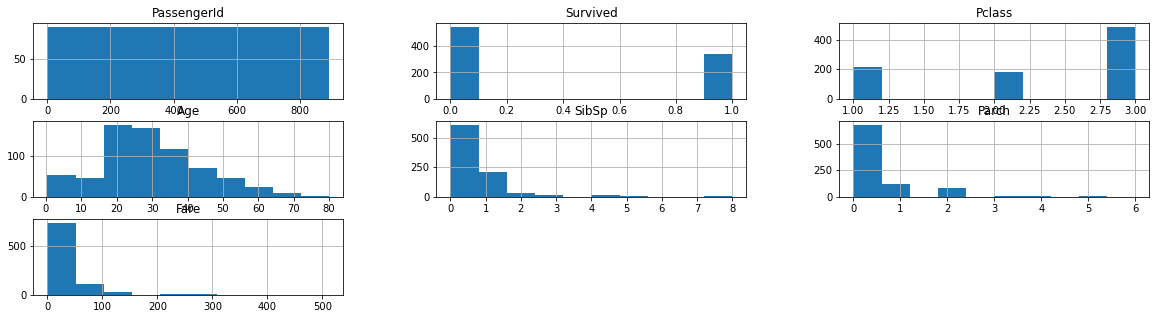

In [61]:
# 데이터가 편중 --> 스케일 정규화 
df.hist(figsize=(20,5))
# plt.show()

from sklearn.preprocessing import StandardScaler #m0 v1
from sklearn.preprocessing import MinMaxScaler # --> 반드시 outlier 제거!!! 필수!!!
from sklearn.preprocessing import RobustScaler # --> outlier 의 영향을 적게 받는다
# 스케일러중에서는 뭐가 좋다고 말하지 못함!
#StandardScaler : median 기준(평균)0, v분산 1 범위 내에서
#MinMaxScaler : 0~1 사이로 다 꾸겨넣음
#RobustScaler : 내가 가지고있는 중위수를 기준으로 min, max 값으로 정규분포.........

In [62]:
scaler = StandardScaler()
#scaler.fit()
#scaler.transform()
X_scaler = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=121, shuffle=True)

In [63]:
models = [dt_model, knn_model, rf_model]
for model in models :
    # fit : 학습하다
    model.fit(X_train, y_train)
    # predict : 시험
    y_pred = model.predict(X_test)
    # score : 예측 정확도 확인
    score = accuracy_score(y_test, y_pred)
    #-- f1, auc, accuracy, 교차검증
    #-- mse mae rmse
    #-- shilluet
    print(model.__class__)
    print(model.__str__(), ":" , score) 

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier() : 0.7821229050279329
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
KNeighborsClassifier() : 0.7653631284916201
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
RandomForestClassifier() : 0.7988826815642458


In [68]:
# ---------------02/05(금)

## 평가 메트릭스   --> conf_matrix, f1_score(), roc_auc() , accuracy_score()

## 7.  데이터 적은경우 --> 데이터 증강 ==> K-Fold, Straitfied K-Fold, GridSearchCV(증강+튜닝) --> 20.02.05
## ==> 대량의 학습으로 예측이 좋아진다.


## 8. 모델이 적절하지 않는 경우 --> 다든 모델 사용 --> XGBoost LightGBM 데이터량 튜닝 어려움

# M L

## 교차검증

여기에 우리가 사용할 데이터가 있고, 그 데이터는 label이 있는 train, test set으로 구성되어 있다. 

이 경우에 만약 'train set을 다시 train set + validation set으로 분리하지 않는다'라고 가정하면, 우리는 모델 검증을 위해서 test set을 사용하여야 할 것이다. 사실상 test set이 아닌 valdiation set인 셈인데, 여기에 한 가지 약점이 존재한다. 고정된 test set을 가지고 모델의 성능을 확인하고 파라미터를 수정하고, 이 과정을 반복하면 결국 내가 만든 모델은 test set에만 잘 동작하는 모델이 된다. 이 경우에는 test set에 과적합(overfitting)되어 다른 실제 데이터를 가지고 예측을 수행하면 엉망인 결과가 나와버리게 된다.

​

이렇듯 고정된 train set과 test set으로 평가를 하고, 반복적으로 모델을 튜닝하다보면 test set에만 과적합되어버리는 결과가 생긴다. 이를 해결하고자 하는 것이 바로 교차 검증(cross validation)이다.

- 장점 
1. 모든 데이터 셋을 평가에 활용할 수 있음.

  - 평가에 사용되는 데이터 편중을 막을 수 있다. 

      (특정 평가 데이터 셋에 overfit 되는 것을 방지할 수 있다.)

  - 평가 결과에 따라 좀 더 일반화된 모델을 만들 수 있다. 

2. 모든 데이터 셋을 훈련에 활용할 수 있다.

  - 정확도를 향상시킬 수 있다.

  - 데이터 부족으로 인한 underfitting을 방지할 수 있다.

​

- 단점 : Iteration 횟수가 많기 때문에 모델 훈련/평가 시간이 오래 걸린다.

​

In [69]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=11, shuffle=True)#random_state 사용시에 shuffle 섞음 을 True 해줘야 함.
score_list = []

In [70]:
for(idx_train, idx_test) in kf.split(X) : # split 이 return해주는 것은 --> train test의 인덱스를 받음
    X_train = X.iloc[idx_train]
    X_test = X.iloc[idx_test]
    y_train = y.iloc[idx_train]
    y_test = y.iloc[idx_test]
    # --------------- 이하 학습 동일 -----------------------------
    # fit : 학습하다
    rf_model.fit(X_train, y_train)
    # predict : 시험
    y_pred = rf_model.predict(X_test)
    # score : 예측 정확도 확인

    score = accuracy_score(y_test, y_pred)
    score_list.append(score)
    print(score)

0.8547486033519553
0.7528089887640449
0.8595505617977528
0.8202247191011236
0.7808988764044944


In [71]:
print(np.mean(score_list))

0.8136463498838742


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gcv_model = GridSearchCV(rf_model, param_grid=my_hyper_param, scoring="accuracy", refit=True, cv=5, verbose=0) #refit_True -> 좋은모델이면 반영시켜라~
# fit : 학습하다
gcv_model.fit(X_train, y_train)
#list에 담을 필요 없음 !

In [ ]:
print("best_estimator_ :", gcv_model.best_estimator_)
print("best_score_  :", gcv_model.best_score_)
print("best_params_ :", gcv_model.best_params_)
#predict 할 필요 없음....
#bootstrapping : 중복허용 복원추출 --> 주머니에서 공을 뽑고나서 다시 뽑음, 그럼 그 공이 또 나울 가능성이 있음.




## 8. 모델이 적절하지 않는 경우 --> 다든 모델 사용 --> XGBoost LightGBM 데이터량 튜닝 어려움